<a href="https://colab.research.google.com/github/nicolenair/fine-tune-MaskRcnn/blob/master/data_preprocess_from_masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
import json
os.chdir('/content/gdrive/My Drive')
#https://haochen23.github.io/2020/06/fine-tune-mask-rcnn.html#.Xvj9Bmozau4

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
os.chdir("PartFace")

In [21]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
mask1 = cv2.imread("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images/Bob_Krueger_0001.ppm")
cv2.imwrite("bk.png", mask1)

True

In [22]:
import re
mask1

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

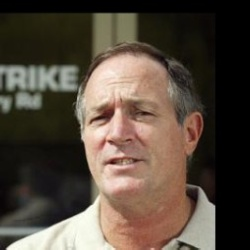

In [23]:
image = cv2.imread("lfw_funneled/Bob_Krueger/Bob_Krueger_0001.jpg")
cv2_imshow(image)

In [25]:
print(len(os.listdir("/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/val/")))

11


In [ ]:
"""
"00000000.jpg8183":
{"filename":"00000000.jpg",
"size":8183,
"regions":
  [{"shape_attributes":
    {"name":"polygon",
    "all_points_x":[99,111,124,129,134,132,144,155,146,149,166,171,168,185,190,190,178,179,198,201,204,210,213,255,271,283,287,277,279,293,298,298,285,285,293,313,325,322,339,341,336,322,320,313,300,321,325,325,323,316,311,303,283,212,195,167,134,113],
    "all_points_y":[72,106,111,108,121,158,177,241,252,265,265,253,187,193,193,244,267,276,271,267,251,228,179,159,183,191,212,220,225,226,219,180,168,161,167,195,218,240,240,231,205,161,151,118,100,70,57,21,11,8,12,59,83,89,58,41,41,54]},
    "region_attributes":{"name":"beagle"}}],
    "file_attributes":{}}"""



'\n"00000000.jpg8183":\n{"filename":"00000000.jpg",\n"size":8183,\n"regions":\n  [{"shape_attributes":\n    {"name":"polygon",\n    "all_points_x":[99,111,124,129,134,132,144,155,146,149,166,171,168,185,190,190,178,179,198,201,204,210,213,255,271,283,287,277,279,293,298,298,285,285,293,313,325,322,339,341,336,322,320,313,300,321,325,325,323,316,311,303,283,212,195,167,134,113],\n    "all_points_y":[72,106,111,108,121,158,177,241,252,265,265,253,187,193,193,244,267,276,271,267,251,228,179,159,183,191,212,220,225,226,219,180,168,161,167,195,218,240,240,231,205,161,151,118,100,70,57,21,11,8,12,59,83,89,58,41,41,54]},\n    "region_attributes":{"name":"beagle"}}],\n    "file_attributes":{}}'

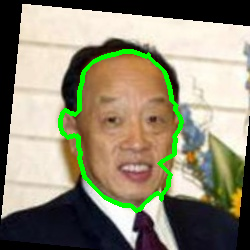

In [80]:
# # list(contours[0][:,0][:,0])
# print(len(os.listdir("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images")))
cv2_imshow(cv2.drawContours(cv2.imread("lfw_funneled/Li_Zhaoxing/Li_Zhaoxing_0005.jpg"), contours, -1, (0,255,0), 3))



In [54]:
im_list = os.listdir("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images")[:1]
diction_train = {}
for i in im_list:
  print(i)
  i2 = "parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images/" + i
  ppm = cv2.imread(i2)
  cv2.imwrite(i2[:-3]+"png", ppm)
  im = cv2.imread(i2[:-3]+"png")
  id = i[:-3]+"png" + str(im.shape[0]*im.shape[1])
  filename = i[:-3]+"png"
  size = im.shape[0]*im.shape[1]
  file_attributes = {}
  name = "polygon"
  imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(imgray, 127, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  all_points_x = contours[0][:,0][:,0]
  all_points_y = contours[0][:,0][:,1]
  region_attributes = {"name":"beagle"}
  diction_train[id] = {"filename":filename, "size":size, "regions":\
                   [{"shape_attributes":\
                     {"name":name,\
                      "all_points_x": [int(e) for e in all_points_x],\
                      "all_points_y": [int(e) for e in all_points_y]},\
                     "region_attributes":region_attributes}],\
                   "file_attributes":{}}
  print(i)
  print("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg")
  cv2.imwrite('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/train/' +  i[:-3]+"png", cv2.imread("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg"))  #"Bob_Krueger/Bob_Krueger_0001.jpg"))
with open('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/train/via_region_data.json', 'w') as fp:
    json.dump(diction_train, fp)

Li_Zhaoxing_0005.ppm
Li_Zhaoxing_0005.ppm
lfw_funneled/Li_Zhaoxing/Li_Zhaoxing_0005.jpg


In [28]:
im_list = os.listdir("parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images")[10:]
diction_train = {}
for i in im_list:
  print(i)
  i2 = "parts_lfw_funneled_gt_images.tgz (Unzipped Files)/parts_lfw_funneled_gt_images/" + i
  ppm = cv2.imread(i2)
  cv2.imwrite(i2[:-3]+"png", ppm)
  im = cv2.imread(i2[:-3]+"png")
  id = i[:-3]+"png" + str(im.shape[0]*im.shape[1])
  filename = i[:-3]+"png"
  size = im.shape[0]*im.shape[1]
  file_attributes = {}
  name = "polygon"
  imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(imgray, 127, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  all_points_x = contours[0][:,0][:,0]
  all_points_y = contours[0][:,0][:,1]
  region_attributes = {"name":"beagle"}
  diction_train[id] = {"filename":filename, "size":size, "regions":\
                   [{"shape_attributes":\
                     {"name":name,\
                      "all_points_x": [int(e) for e in all_points_x],\
                      "all_points_y": [int(e) for e in all_points_y]},\
                     "region_attributes":region_attributes}],\
                   "file_attributes":{}}
  print(i)
  print("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg")
  cv2.imwrite('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/val/' +  i[:-3]+"png", cv2.imread("lfw_funneled/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]-1] + "/" + i[:re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1] + i[re.match("([A-Z][a-z|A-z|-]+_)+", i).span()[1]+1:-3]+"jpg"))  #"Bob_Krueger/Bob_Krueger_0001.jpg"))
with open('/content/gdrive/My Drive/fine-tune-MaskRcnn/beagle/val/via_region_data.json', 'w') as fp:
    json.dump(diction_train, fp)

Curt_Weldon_0001.ppm
Curt_Weldon_0001.ppm
lfw_funneled/Curt_Weldon/Curt_Weldon_0001.jpg
Tori_Amos_0001.ppm
Tori_Amos_0001.ppm
lfw_funneled/Tori_Amos/Tori_Amos_0001.jpg
Paul_Wolfowitz_0003.ppm
Paul_Wolfowitz_0003.ppm
lfw_funneled/Paul_Wolfowitz/Paul_Wolfowitz_0003.jpg
Gerardo_Gambala_0001.ppm
Gerardo_Gambala_0001.ppm
lfw_funneled/Gerardo_Gambala/Gerardo_Gambala_0001.jpg
Monica_Seles_0004.ppm
Monica_Seles_0004.ppm
lfw_funneled/Monica_Seles/Monica_Seles_0004.jpg
Chris_Columbus_0001.ppm
Chris_Columbus_0001.ppm
lfw_funneled/Chris_Columbus/Chris_Columbus_0001.jpg
Greg_Owen_0001.ppm
Greg_Owen_0001.ppm
lfw_funneled/Greg_Owen/Greg_Owen_0001.jpg
David_Ballantyne_0001.ppm
David_Ballantyne_0001.ppm
lfw_funneled/David_Ballantyne/David_Ballantyne_0001.jpg
Bob_Graham_0003.ppm
Bob_Graham_0003.ppm
lfw_funneled/Bob_Graham/Bob_Graham_0003.jpg
Bernardo_Segura_0002.ppm
Bernardo_Segura_0002.ppm
lfw_funneled/Bernardo_Segura/Bernardo_Segura_0002.jpg
Freda_Black_0001.ppm
Freda_Black_0001.ppm
lfw_funneled/Freda

KeyboardInterrupt: ignored

In [18]:
# import cv2
# from google.colab.patches import cv2_imshow

In [ ]:
# os.listdir('/content/gdrive/My Drive/fine-tune-MaskRcnn')

['.git',
 'LICENSE',
 'README.md',
 'beagle.py',
 'mask_rcnn_coco.h5',
 'Mask_RCNN',
 '__pycache__',
 'beagle2',
 'beagle']

In [ ]:
# %%shell
# pip install -U scikit-image
# pip install -U cython
# pip3 install git+https://github.com/waleedka/coco.git#egg=pycocotools&subdirectory=PythonAPI

In [ ]:
# !wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
# !tar -xvzf "lfw-funneled.tgz" 